# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# 2. Collect and load data

In [2]:
df=pd.read_csv('bigcity.csv',index_col=0)
df

,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75
6,37,63
7,29,50
8,23,48
9,30,111
10,2,50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   u       49 non-null     int64
 1   x       49 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


# 3. Explore numeric variables - five number summary

In [4]:
df_numeric=df.select_dtypes(include=np.number)
df_numeric

,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75
6,37,63
7,29,50
8,23,48
9,30,111
10,2,50


In [5]:
df_numeric.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

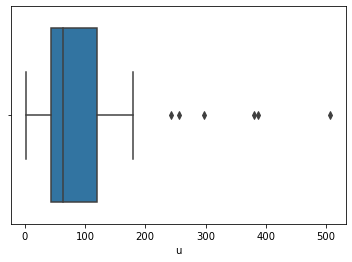

In [6]:
sns.boxplot(df_numeric.u)
plt.show()

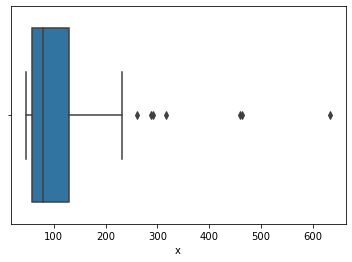

In [7]:
sns.boxplot(df_numeric.x)
plt.show()

In [8]:
df_numeric.u.var()

10900.416666666662

In [9]:
df_numeric.u.std()

104.40506054146351

In [10]:
df_numeric.x.var()

15158.832482993197

In [11]:
df_numeric.x.std()

123.12121053252034

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

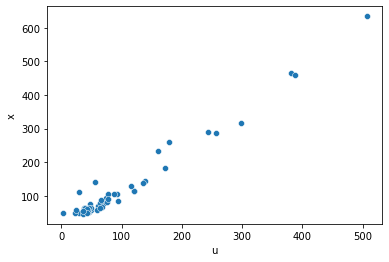

In [12]:
sns.scatterplot(df.u,df.x)
plt.show()

In [13]:
# WE cannot do cross tabulation as both the variable u and x are numerical

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [14]:
X=df.loc[:,'u']
X

1     138
2      93
3      61
4     179
5      48
6      37
7      29
8      23
9      30
10      2
11     38
12     46
13     71
14     25
15    298
16     74
17     50
18     76
19    381
20    387
21     78
22     60
23    507
24     50
25     77
26     64
27     40
28    136
29    243
30    256
31     94
32     36
33     45
34     67
35    120
36    172
37     66
38     46
39    121
40     44
41     64
42     56
43     40
44    116
45     87
46     43
47     43
48    161
49     36
Name: u, dtype: int64

In [15]:
y=df['x']
y

1     143
2     104
3      69
4     260
5      75
6      63
7      50
8      48
9     111
10     50
11     52
12     53
13     79
14     57
15    317
16     93
17     58
18     80
19    464
20    459
21    106
22     57
23    634
24     64
25     89
26     77
27     60
28    139
29    291
30    288
31     85
32     46
33     53
34     67
35    115
36    183
37     86
38     65
39    113
40     58
41     63
42    142
43     64
44    130
45    105
46     61
47     50
48    232
49     54
Name: x, dtype: int64

In [16]:
df.shape

(49, 2)

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [17]:
df.isnull().sum()

u    0
x    0
dtype: int64

In [18]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


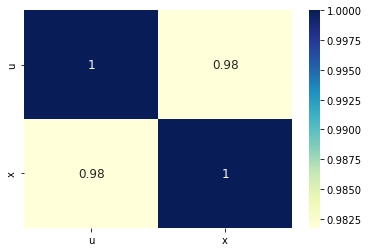

In [19]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',annot_kws={'size':12})
plt.show()

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((39,), (10,), (39,), (10,))

# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [22]:
model=LinearRegression()
X_train=pd.DataFrame(X_train)
model.fit(X_train,y_train)

LinearRegression()

In [23]:
model.coef_

array([1.16155798])

In [24]:
model.intercept_

5.662522617269246

# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

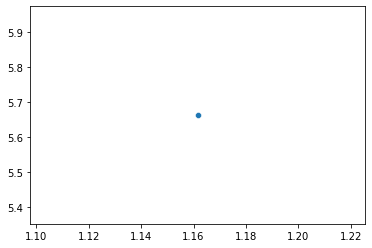

In [25]:
sns.scatterplot(model.coef_,model.intercept_)
plt.show()

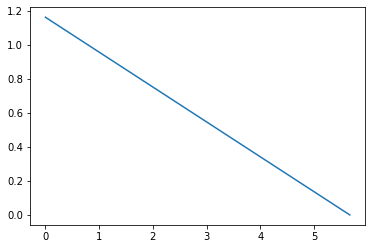

In [26]:
plt.plot((0,model.intercept_),(model.coef_,0))

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [27]:
X_test=pd.DataFrame(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(model.predict(X_train),y_train)

In [31]:
RMSE_train=np.sqrt(mse_train)
RMSE_train

21.391065474021044

In [32]:
mse_test=mean_squared_error(model.predict(X_test),y_test)

In [34]:
RMSE_test=np.sqrt(mse_test)
RMSE_test

29.588647721155887

In [35]:
from sklearn.metrics import r2_score

In [38]:
R_square_train=r2_score(y_train,model.predict(X_train))
R_square_train

0.9737243775595023

In [39]:
R_square_Test=r2_score(y_test,model.predict(X_test))

In [40]:
R_square_Test

0.7740675938150546

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [42]:
model.score(X_train,y_train)

0.9737243775595023

In [43]:
model.score(X_test,y_test)

0.7740675938150546